In this notebook, we will visualize the learned HMM model. We will use the code from Set 6, to help us. 

In [1]:
import os
import numpy as np
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)
from hmm_visualizations_helper import (
    top_ten_words
)
import data_preprocess as data
from HMM import unsupervised_HMM
from HMM_sonnet_helper import sample_sonnet
#from collections import Counter
#from string import punctuation
#import nltk
#nltk.download('stopwords')
import matplotlib.pyplot as plt
%matplotlib inline

Let's run a sample HMM.

In [2]:
obs, obs_map = data.get_shakes_lines()
hmm10 = unsupervised_HMM(obs, 3, 10)
sample_sonnet(hmm10, obs_map)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.26s/it]


Like double though cruel being palate
Deaths out do still frame happier disease power
Serving be thou steeled not or familiar
Adieu would hath and find half you so bright
Give thy of confined hadst cold this most a
For who time illwresting your are beauty
Face glory were spends live if things that of
Saved that looks of long wisdom but me with
Sinks arrest heart veil my must muse winter
Eye seeming leave nor lovers my my thee
With expressed whole live pay outstripped be and
Is gold then life wrackful same sea assailed
Paper outright have when tongue dost learning
Thee truth habit are anger beauty doth



First, we visualize each state as a wordcloud by sampling a large emission from the state:

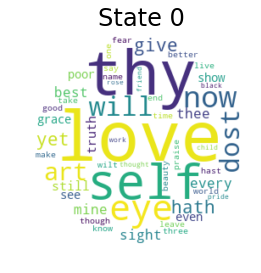

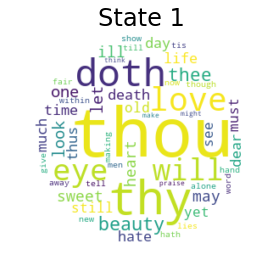

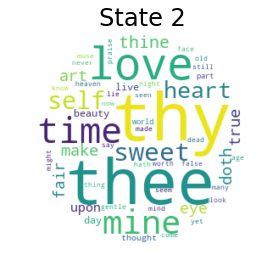

In [3]:
wordclouds, sentences = states_to_wordclouds(hmm10, obs_map)

Now, we'll give a list of the top 10 words that associate with each hidden state.

The top 10 words for state 0 are:
that: 952
me: 865
and: 730
but: 588
the: 568
as: 506
all: 470
when: 431
in: 423
love: 353



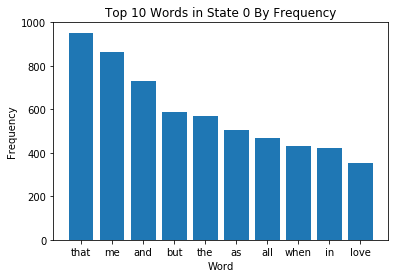

The top 10 words for state 1 are:
to: 1674
thou: 1268
and: 1248
is: 811
i: 769
my: 693
of: 616
for: 581
not: 524
thy: 490



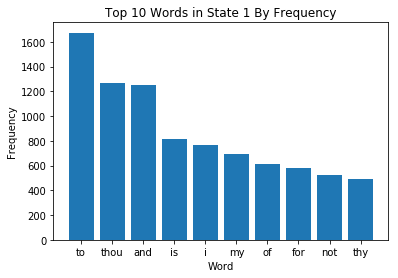

The top 10 words for state 2 are:
the: 1702
my: 1430
of: 1155
in: 1130
and: 898
i: 865
thy: 778
thee: 721
with: 696
to: 611



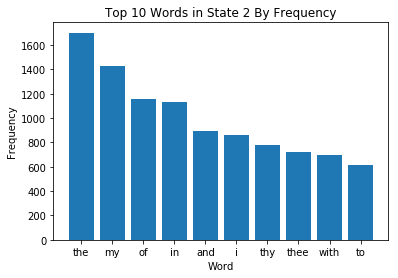

In [4]:
most_freq = []
for i in range(len(sentences)):
    x = []
    y = []
    top_ten = top_ten_words(sentences[i])
    # print top 10 words
    print("The top 10 words for state " + str(i) + " are:")
    for j in range(len(top_ten)):
        print(top_ten[j][0] + ": " + str(top_ten[j][1]))
        x.append(top_ten[j][0])
        y.append(top_ten[j][1])
    print()
    
    # plot top 10 words
    plt.figure(i)
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x_pos, y)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    title = "Top 10 Words in State " + str(i) + " By Frequency"
    plt.title(title)
    plt.xticks(x_pos, x)
    plt.show()

Now, let's animate the emissions.

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "



Animating...


NameError: name 'HTML' is not defined

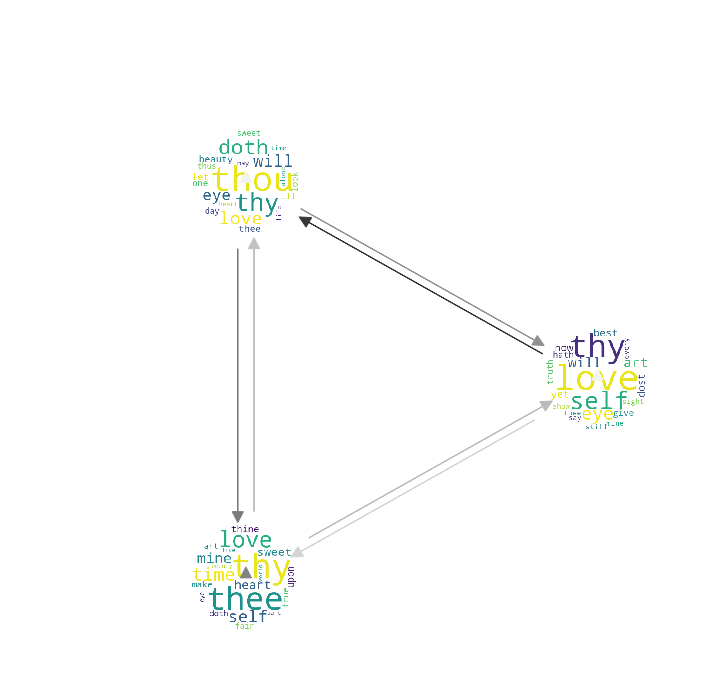

In [5]:
anim = animate_emission(hmm10, obs_map, M=8)
HTML(anim.to_html5_video())